In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline 

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

<ipython-input-3-9c9dc12da179>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


### 데이터 로드하기

In [5]:
df = pd.read_csv("healthcare.csv")

In [15]:
del df['Unnamed: 0']

### 데이터 요약하기

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13108787 entries, 0 to 13108786
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   가입자 일련번호  int64  
 1   시도코드      int64  
 2   연령대코드     int64  
 3   서식코드      int64  
 4   주상병코드     object 
 5   부상병코드     object 
 6   심결가산율     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 700.1+ MB


In [17]:
df.columns

Index(['가입자 일련번호', '시도코드', '연령대코드', '서식코드', '주상병코드', '부상병코드', '심결가산율'], dtype='object')

#### 상위 10개 질병코드 ✔️
  1. I109 = 고혈압 
  2. F_ = 알츠하이머, 치매 
  3. J209 = 상세불명의 급성 기관지염
  4. M4806 = 척추 협착
  5. M170 = 무릎관절증
  6. E119 = 당뇨병
  7. M5456 = 허리통증 
  8. N185 = 신장(신장관련 질병)
  9. M511 = 좌골신경통
  10. N400 = 전립선증식증

In [39]:
# 고혈압 환자의 병원 이용 현황 
df_di_ho = df[df.주상병코드 =="I109"]
df_di_ho

,가입자 일련번호,시도코드,연령대코드,서식코드,주상병코드,부상병코드,심결가산율
118,10,27,15,3,I109,E119,0.25
124,10,27,15,3,I109,E119,0.25
126,10,27,15,3,I109,E119,0.25
128,10,27,15,3,I109,I209,0.25
145,14,49,15,3,I109,K580,0.15
...,...,...,...,...,...,...,...
13108636,999991,44,16,3,I109,E119,0.15
13108641,999991,44,16,3,I109,E119,0.15
13108643,999991,44,16,3,I109,E119,0.15
13108645,999991,44,16,3,I109,E119,0.15


In [52]:
df1 = df_di_ho.groupby('심결가산율')['주상병코드'].value_counts().to_frame()
df1

,,주상병코드
심결가산율,주상병코드,
0.15,I109,635382
0.20,I109,35729
0.25,I109,21375
0.30,I109,2607


In [56]:
total = df1.주상병코드.sum()
df1['방문 비율(%)'] = df1['주상병코드'] / total * 100
df1

,,주상병코드,방문 비율(%)
심결가산율,주상병코드,,
0.15,I109,635382,91.409639
0.20,I109,35729,5.140175
0.25,I109,21375,3.075128
0.30,I109,2607,0.375058


<AxesSubplot:ylabel='방문 비율(%)'>

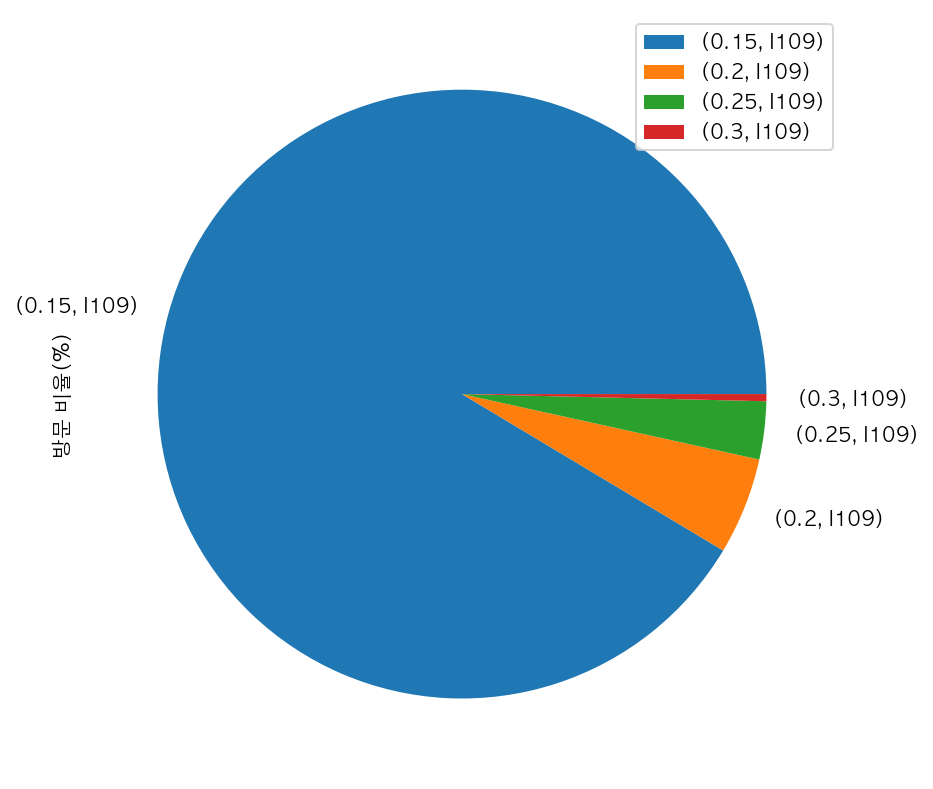

In [57]:
df1.plot.pie(y='방문 비율(%)', figsize= (7,7))

치매환자

In [44]:
df_di_ho1 = df[df['주상병코드'] =="F_"]
df2 = df_di_ho1.groupby('심결가산율')['주상병코드'].value_counts().to_frame()
df2

,,주상병코드
심결가산율,주상병코드,
0.15,F_,256343
0.20,F_,66752
0.25,F_,52287
0.30,F_,24259


In [54]:
total = df2.주상병코드.sum()
df2['방문 비율(%)'] = df2['주상병코드'] / total * 100
df2

,,주상병코드,방문 비율(%)
심결가산율,주상병코드,,
0.15,F_,256343,64.143319
0.20,F_,66752,16.702991
0.25,F_,52287,13.083492
0.30,F_,24259,6.070198


✔️ 치매환자 역시 의원을 많이 방문하지만, 일반 병원 혹은 종합병원에도 분포되어 있음

<AxesSubplot:ylabel='방문 비율(%)'>

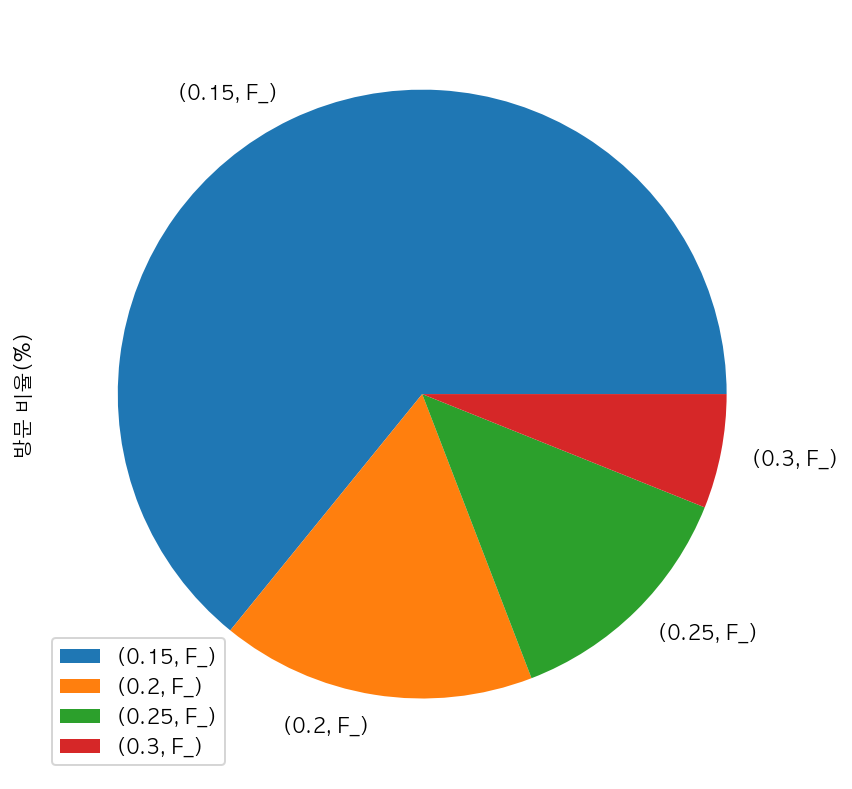

In [59]:
df2.plot.pie(y='방문 비율(%)', figsize= (7,7))

In [63]:
df_di_ho2 = df[df['주상병코드'] =="J209"]
df3 = df_di_ho2.groupby('심결가산율')['주상병코드'].value_counts().to_frame()

total = df3.주상병코드.sum()
df3['방문 비율(%)'] = df3['주상병코드'] / total * 100
df3


,,주상병코드,방문 비율(%)
심결가산율,주상병코드,,
0.15,J209,1005941,88.206626
0.20,J209,113593,9.960480
0.25,J209,20403,1.789051
0.30,J209,500,0.043843


기관지염 

<AxesSubplot:ylabel='방문 비율(%)'>

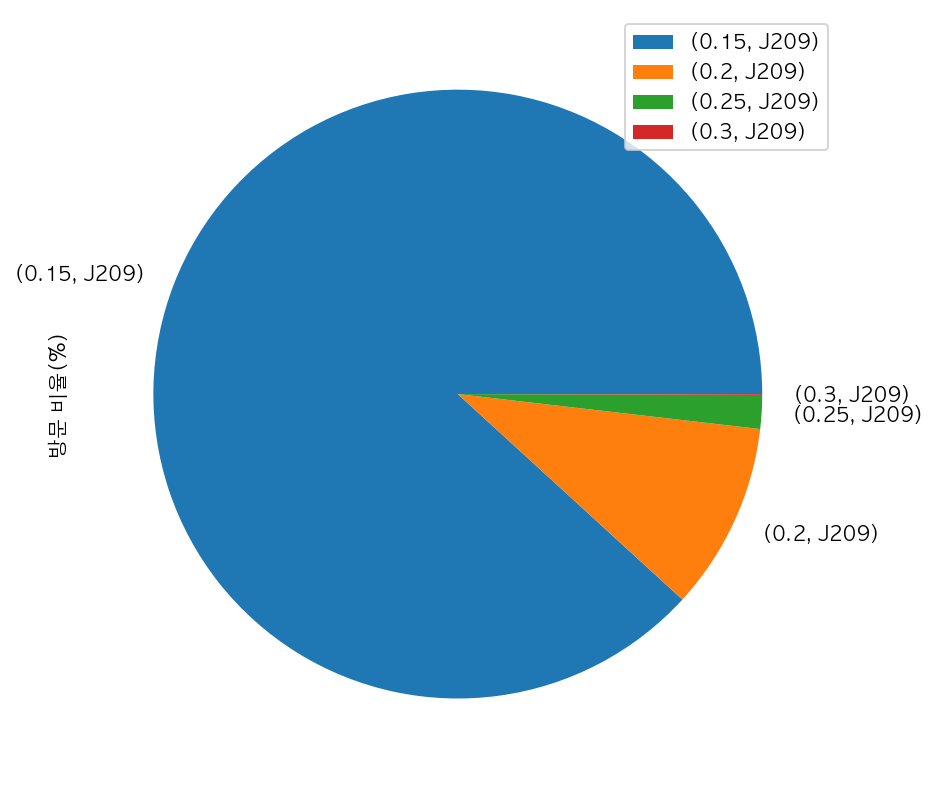

In [64]:
df3.plot.pie(y='방문 비율(%)', figsize= (7,7))

In [66]:
df_di_ho3 = df[df['주상병코드'] =="E119"]
df4 = df_di_ho3.groupby('심결가산율')['주상병코드'].value_counts().to_frame()

total = df4.주상병코드.sum()
df4['방문 비율(%)'] = df4['주상병코드'] / total * 100
df4

,,주상병코드,방문 비율(%)
심결가산율,주상병코드,,
0.15,E119,188701,84.439423
0.20,E119,16711,7.477794
0.25,E119,14989,6.707238
0.30,E119,3074,1.375545


당뇨병

<AxesSubplot:ylabel='방문 비율(%)'>

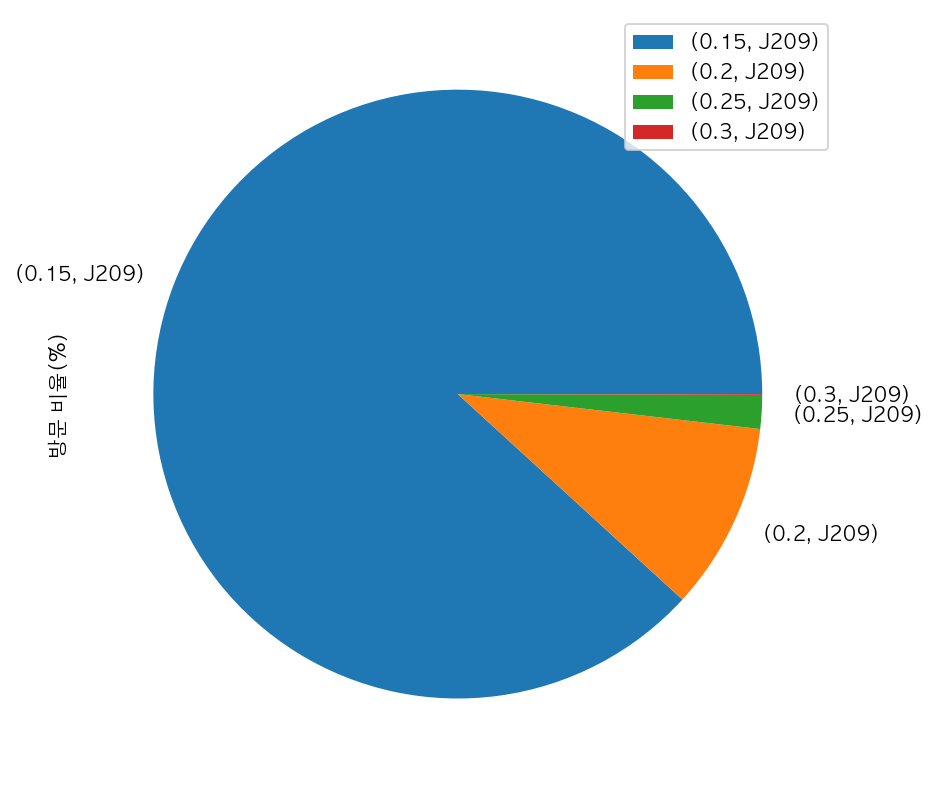

In [67]:
df3.plot.pie(y='방문 비율(%)', figsize= (7,7))